<h1>flow_hierarchy checks</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

from flow_hierarchy import hpy
from timeit import default_timer
import mat4py
import networkx as nx
import os

In [2]:
def gen_random_adj(size=5,p=0.5):
    S = size
    adj = np.tril(np.random.randint(10,size=(S,S))*np.random.randint(2,size=(S,S)),-1) + np.triu(np.random.randint(5,size=(S,S))*np.random.choice([0,1],size=(S,S),p=[p,1-p]),1) 
    return adj

adj size = (50, 50)
h=0.40212443095599393,0.40212443095599393
h_randwire=0.1358118361153262,0.1358118361153262
h_randweight=0.41691957511380884,0.41691957511380884


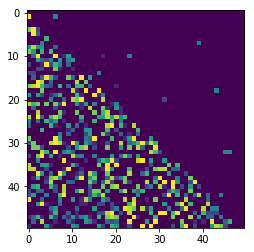

In [3]:

adj = gen_random_adj(50,p=0.99)
plt.imshow(adj)
print('adj size =',adj.shape)
#adj = adj>0*1
#fh
h = hpy(adj)
g = nx.DiGraph(adj)
h2 = nx.flow_hierarchy(g,weight='weight')

#fh random rewiring
N = adj.shape[0]
perm = np.random.permutation(N)
h_randwire = hpy(adj[:, perm])
g = nx.DiGraph(adj[:, perm])
h_randwire2 = nx.flow_hierarchy(g,weight='weight')

#fh random weight shuffling
nonz = np.nonzero(adj)
weights = adj[nonz]
np.random.shuffle(weights)
adj[nonz] = weights
h_randweight = hpy(adj)
g = nx.DiGraph(adj)
h_randweight2 = nx.flow_hierarchy(g,weight='weight')


print(f'h={h},{h2}')
print(f'h_randwire={h_randwire},{h_randwire2}')
print(f'h_randweight={h_randweight},{h_randweight2}')

In [4]:
times = {'py_np':[],'nx':[]}
methods = {'py_np':np.zeros,'nx':''}
sizes = [10,20,30,50,70,100]

for size in sizes:
    print(size)
    #adj =np.random.binomial(1,0.2,size=(size,size))
    adj = gen_random_adj(size=size)
    
    print('recurrence=',np.sum((adj>0)*1)/np.product(adj.shape))
    
    for method in methods.keys():
        if method=='nx':
            g = nx.DiGraph(adj)
            start = default_timer()
            h = nx.flow_hierarchy(g,weight='weight')
            end = default_timer()
            time = end-start
            times[method] +=[time]
        else:    
            fh1,time = hpy(adj,output_exec_time=True,mat_init_func=methods[method])
            times[method] +=[time]



10
recurrence= 0.43
20
recurrence= 0.37
30
recurrence= 0.39222222222222225
50
recurrence= 0.4084
70
recurrence= 0.42142857142857143
100
recurrence= 0.4138


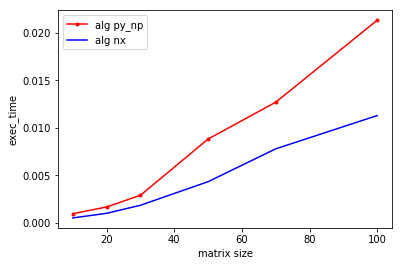

In [5]:
method_styles = {'py_np':'r.-','nx':'b-'}

fig = plt.figure()
for key in times.keys():
    plt.plot(sizes,times[key],method_styles[key],label='alg '+key)
plt.xlabel('matrix size')
plt.ylabel('exec_time')
plt.legend()
plt.show()
